### Exercise
Sample 1000 random numbers from $Exp(\lambda)$ distribution using the inverse transform method. Plot the histogram and the true probability density function (PDF).

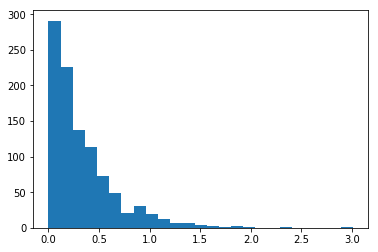

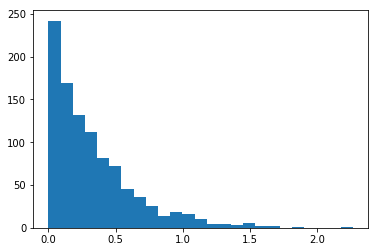

In [65]:
import random as r
import math as m
import numpy as np
import matplotlib.pyplot as plt
lam = 3
exp = np.ones(1000)
rand = np.random.uniform(0, 1, 1000)
for i in range(1000):
    exp[i] = -m.log(1-rand[i]) / lam
plt.hist(exp, 25)
plt.show()
for i in range(1000):
    exp[i] = r.expovariate(lam)
plt.hist(exp, 25)
plt.show()

### Rejection sampling (Accept-reject method)

Next figure shows an idea:

<img src="https://colcarroll.github.io/hamiltonian_monte_carlo_talk/images/bayes_talk.015.png" style="width: 50%;"/>

We sample points from proposal PDF (which is known and is easy to sample from) and discard points that are above the target PDF. 

### Exercise
Proove that the accept-reject method is valid. Sample 100 points from truncated cauchy distribution given below using uniform random number generator and the accept-reject method. Plot obtained histogram and the true pdf.

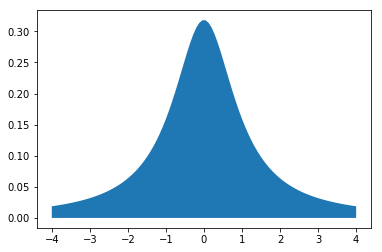

In [8]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

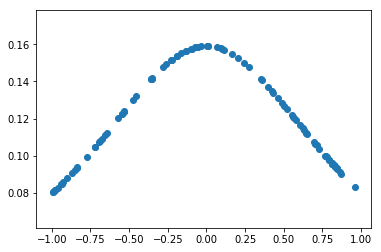

In [6]:
#обоснование accept-reject метода: 
#Отбор выборки основан на наблюдении, 
#что для выборки случайной переменной можно выполнить равномерно случайную выборку 
#двумерного декартова графа и сохранить образцы в области под графиком ее функции плотности.
import numpy as np
import matplotlib.pyplot as plt
import math
rand = np.random.uniform(-1,1,100)
y = (1 / (2 * math.pi)) * (1 / ( 1 + rand * rand ))
plt.scatter(rand, y)
plt.show()

Accept-reject method allows to sample from any areas and volumes. However, it may be very inefficient. Sometimes it is possible to find coordinate transformation that maps given region to simple one which is easy to sample from (e.g. unit square).

##  Coordinate transformation

### Exercise
Sample 100 point uniformly distributed inside the triangle given below. To do this, find an appropriate transformation from a unit square and sample from it. Check that you have no rejected points. Plot sampled points.

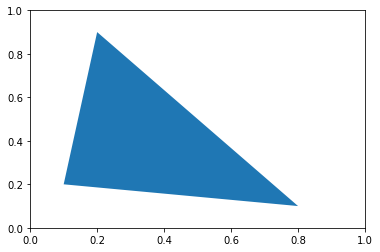

In [10]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

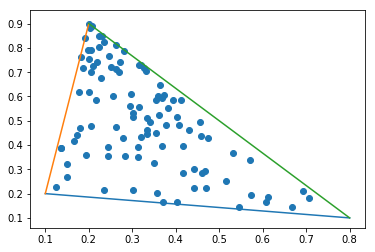

In [16]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
x = np.random.uniform(0,1,100)
y = np.random.uniform(0,1,100)
x1 = 0.7 * x * (1 - y) + 0.1 * y + 0.1 
y1 = -0.1 * x * (1 - y) + 0.7 * y + 0.2 
plt.scatter(x1 ,y1)
plt.plot([0.1,0.8],[0.2,0.1])
plt.plot([0.1,0.2],[0.2,0.9])
plt.plot([0.2,0.8],[0.9,0.1])
plt.show()

### Exercise
Sample 100 point uniformly distributed inside the unit circle. Check that your method does not produce any rejected points. Plot sampled points.

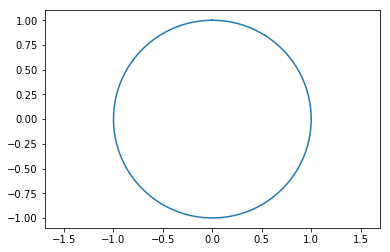

In [12]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

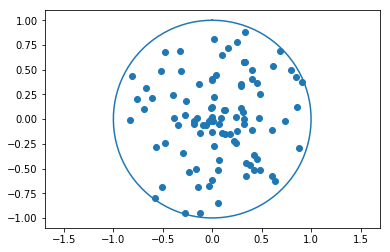

In [72]:
import numpy as np
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
radius = np.random.uniform(0, 1,100)
angle = np.pi * np.random.uniform(0, 2,100)
x = radius * np.cos(angle)
y = radius * np.sin(angle)
plt.scatter(x, y)
plt.show() 

## Random normal generator

### Exercise
Check theoretically and numerically that the following algorithm (also called Box-Muller algorithm) generates pairs of independent N(0,1) variables. Modify it to exclude ```np.sin``` and ```np.cos``` calls.

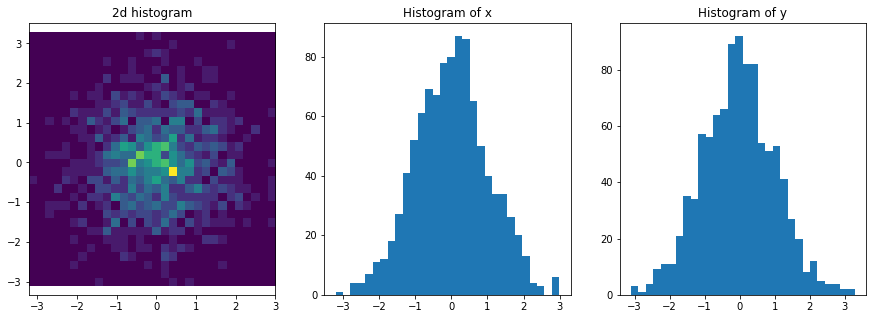

In [67]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

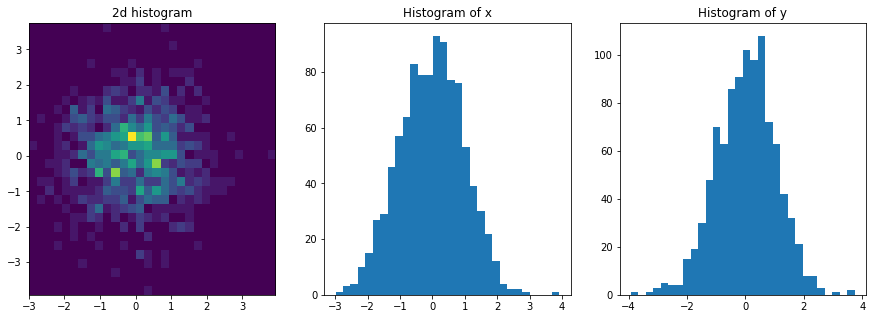

In [68]:
# якобиан полярной замены = r
# P(r <= x) = P(sqrt(-2log(u1)) <= x) = P(-2log(u1) <= x^2) = P(logu1 >= -x^2 / 2)  = 1 - P(u1 <= exp(-x^2 / 2)) ~ N(0,1)
import numpy as np
import math
import matplotlib.pyplot as plt
n = 1000
u1, u2 = 2*np.random.rand(2, n) - 1
s = np.array(u1*u1 + u2*u2)
cur = 0
for i in range(1000) :
    if (s[i] < 1) :
        x[cur] = (math.sqrt((-2) * math.log(s[i])/s[i])) * u1[i]
        y[cur] = (math.sqrt((-2) * math.log(s[i])/s[i])) * u2[i]
        cur = cur + 1
xx = []
for i in range(len(x)) :
    xx.append(x[i])

yy = []
for i in range(len(y)) : #808 - размер массива 
    yy.append(y[i])

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(xx, yy, bins=30)
ax[0].axis('equal')
ax[1].hist(xx, bins=30)
ax[2].hist(yy, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

## Markov Chain Monte Carlo (MCMC)

Рассмотрим граф $G=(V,E)$, вершинам которого случайным образом приписаны значения 0 и 1 так, что смежные вершины не могут одновременно иметь значение 1. Пример расстановки значений по вершинам графа (черные вершины имеют значение 1, белые - 0):

![img](http://www.mathematik.uni-ulm.de/stochastik/lehre/ss06/markov/skript_engl/bild4.jpg)

Как оценить, сколько в среднем закрашенных вершин будет иметь такой граф?

Сформулируем задачу в математических терминах.

Пусть $\xi \in \{0,1\}^{V}$ обозначает конфигурацию графа (расстановку 0 и 1 по вершинам). Назовем конфигурацию допустимой, если вершины, соединенные ребрами, не имеют одновременно значения 1. Пусть $Z_G$ - общее количество допустимых конфигураций. Зададим  распределение на множестве всех конфигураций:
$$\begin{equation*}
\mu(\xi) = 
 \begin{cases}
   \frac{1}{Z_G}, &\xi - \text{допустимая конфигурация}\\
   0, &\text{иначе.}
 \end{cases}
\end{equation*}$$
Обозначим $n(\xi)$ - число закрашенных вершин в конфигурации $\xi$. Тогда
$$\begin{equation*}
{\rm E} n(\xi) = \sum_{x \in \{0,1\}^V} n(x) \mu(x) = \frac{1}{Z_G} \sum_{x \in \{0,1\}^V} n(x) {\rm I}_{\{\xi - \text{допустимая} \}}
\end{equation*}$$

Явно перебирать все $x \in \{0,1\}^{V}$ сложновато. Мы могли бы попробовать оценить ${\rm E} n(\xi)$, используя закон больших чисел:
$$\begin{equation*}
{\rm E} n(\xi) \approx \frac{1}{N} \sum_{i=1}^{N} n(\xi), \text{где } \xi \sim \mu
\end{equation*}$$
Но есть проблема: как смоделировать случайную величину из распределения $\mu$?

В этом нам поможет метод MCMC.

### Метод MCMC

Предназначение: приближенное моделирование случаных величин из заданного распредедения 

Идея:
* построить эргодическую цепь Маркова, для которой стационарное распределение - это в точности наше заданное распределение

* инициировать блуждание по цепи Маркова из некоторого начального состояния и дождаться, когда распределение сойдется в стационарному. С этого момента состояния цепи Маркова можно считать выборкой из желаемого распределения.

Вот как это работает https://chi-feng.github.io/mcmc-demo/app.html#RandomWalkMH,multimodal

Алгоритм:
* пусть $\pi$ - заданное распределение (не обязательно нормированное к 1) на множестве $\Omega$
* пусть $Q = (q_{i,j})$ - матрица переходных вероятностей произвольной цепи Маркова с состояниями из $\Omega$
* выберем произвольное $X_0$ из $\Omega$
* для текущего $X_n$ смоделируем значение $Z_{n+1}$ из распределения $q_{X_n, \cdot}$
* смоделируем случайную величину $\alpha$ из распределения Бернулли с вероятностью успеха
$$
p = \min ( 1, \frac{\pi_j q_{j,i}}{\pi_i q_{i,j}} )
$$
* если $\alpha$ = 1, то $X_{n+1} = Z_{n+1}$, иначе $X_{n+1} = X_{n}$.

Обоснование и доказательства можно почитать здесь http://probability.ca/jeff/ftpdir/johannes.pdf

Некоторые типичные способы задания $q$:
* Metropolis algorithm: $q_{i,j} = q_{j,i}$
* Random walk Metropolis-Hastings: $q_{i,j} = q(j - i)$
* Independence sampler: $q_{i,j} = q(j)$ independent of $i$

### Задание
1) Описать применение МСМС к задаче оценки  ${\rm E} n(\xi)$, доказать все попутные утверждения

2) Оценить  ${\rm E} n(\xi)$ с помощью МСМС

3) Построить график распределеиня $n(\xi)$

4) Реализовать генератор случайных графов с допустимыми конфигурациями.

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray.
        Mask for vertices colors.
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.full_like(narr, 'red', dtype='U5')
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

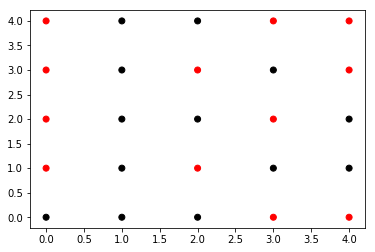

In [70]:
size = 5
narr = np.random.choice([True, False], size=(size, size))
plot_grid(narr)

14.828


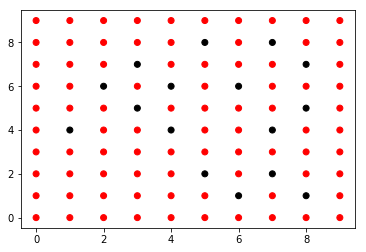

In [116]:
# Будем моделировать достаточно много конфигураций, вычисляя для каждой число закрашенных вершин, по закону больших чисел
# эта величина будет стремиться к необходимому нам среднему значению

import numpy as np
size = 10
X = np.array([[False for i in range(size)] for j in range(size)])

def around(X) :
    if (X[v[0]][v[1]-1] == False and X[v[0]-1][v[1]] == False and X[v[0]][v[1]+1] == False and X[v[0]+1][v[1]] == False) :
        return 1
    else :
        return 0
    return 0

black_number = 0
cur_cnt = 0

for i in range(1000):
    v = [np.random.choice(8)+1,np.random.choice(8)+1]
    q = np.random.choice(2)
    if (q == 1 and around(X) == 1) :
        if (X[v[0]][v[1]] == False) :
            cur_cnt += 1
        X[v[0]][v[1]] = True
    else :
        if (X[v[0]][v[1]] == True) :
            cur_cnt -= 1
        X[v[0]][v[1]] = False
    black_number += cur_cnt

print(black_number / 1000)

plot_grid(X)

### Submit to https://goo.gl/forms/aszSXdC53VV19kwx2